In [1]:
import pandas as pd

cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

D =pd.read_csv("wine.csv", names=cols)
D.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
unique = pd.unique(D['Class'])
print(unique)
n = len(unique)

print("No.of.unique values :", n)

[1 2 3]
No.of.unique values : 3


In [5]:
Y = D['Class']
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64


In [7]:
X = D.loc[:, D.columns != 'Class']
print(X)

     Alcohol  MalicAcid   Ash  AlcalinityOfAsh  Magnesium  TotalPhenols  \
0      14.23       1.71  2.43             15.6        127          2.80   
1      13.20       1.78  2.14             11.2        100          2.65   
2      13.16       2.36  2.67             18.6        101          2.80   
3      14.37       1.95  2.50             16.8        113          3.85   
4      13.24       2.59  2.87             21.0        118          2.80   
..       ...        ...   ...              ...        ...           ...   
173    13.71       5.65  2.45             20.5         95          1.68   
174    13.40       3.91  2.48             23.0        102          1.80   
175    13.27       4.28  2.26             20.0        120          1.59   
176    13.17       2.59  2.37             20.0        120          1.65   
177    14.13       4.10  2.74             24.5         96          2.05   

     Flavanoids  NonflavanoidPhenols  Proanthocyanins  ColorIntensity   Hue  \
0          3.06     

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = X

# Min-Linkage
'''
The advantage of the Min method is that it can accurately handle non-elliptical shapes.
The disadvantages are that it is sensitive to noise and outliers.
'''
Z1 = linkage(data, method='single', metric='euclidean')

# Max-Linkage
'''
Max is less sensitive to noise and outliers in comparison to MIN method.
However, MAX can break large clusters and tends to be biased towards globular clusters.
'''
Z2 = linkage(data, method='complete', metric='euclidean')

# Average-Linkage
'''
The Average method defines the distance between clusters as the average pairwise distance among all pairs of points in the clusters.
'''
Z3 = linkage(data, method='average', metric='euclidean')

# Ward-Linkage
'''
 The Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers.
 Compared to the distance-based measures, the Ward method is less susceptible to noise and outliers.
'''
Z4 = linkage(data, method='ward', metric='euclidean')

# Centroid-Linkage
'''
 The Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers.
 Compared to the distance-based measures, the Ward method is less susceptible to noise and outliers.
'''
Z5 = linkage(data, method='centroid', metric='euclidean')

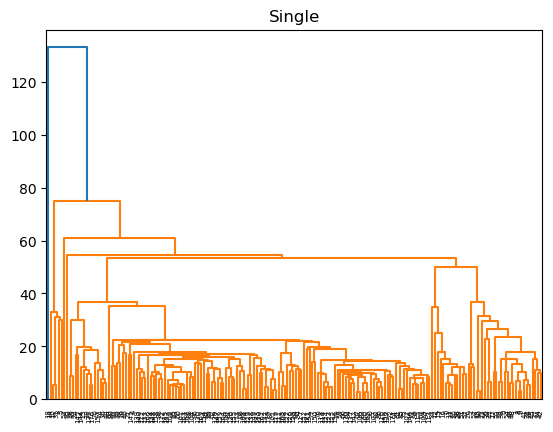

In [11]:
import matplotlib.pyplot as plt

# Single linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.show()

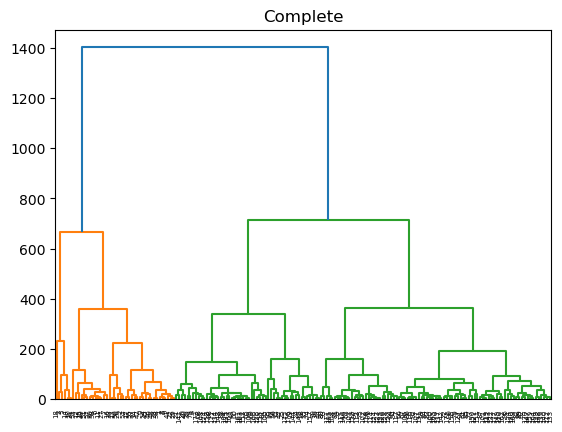

In [13]:

# Complete linkage dendogram plot
plt.plot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.show()

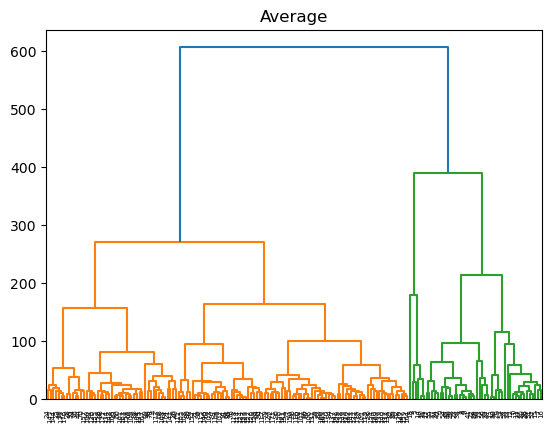

In [15]:
# Average linkage dendogram plot
plt.plot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.show()

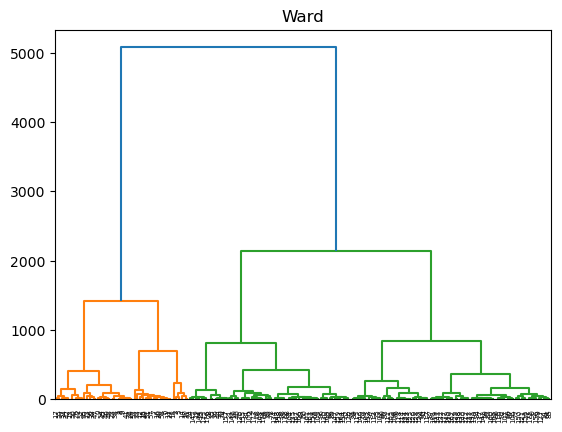

In [17]:
# Ward linkage dendogram plot
plt.plot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

In [ ]:
# Ward linkage dendogram plot
plt.plot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

***Post Pruning***

In [22]:
from scipy.cluster.hierarchy import fcluster

c = fcluster(Z4, 3, criterion='maxclust')

print(f"Clusters: {c}")

Clusters: [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 2 3 3 2 3 3 2 2 2 3 3 1
 2 3 3 3 2 3 3 2 2 3 3 3 3 3 2 2 3 3 3 3 3 1 2 3 2 3 2 3 3 3 2 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 2 3 3 3 3 2 3 3 2 2 3 2
 2 3 3 3 3 2 2 2 3 2 2 2 3 2 3 2 2 3 2 2 2 2 3 3 2 2 2 2 2 3]


# **Cluster evaluation with Ground Truth**
**Rand index**

Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the (adjusted or unadjusted) Rand index is a function that measures the similarity of the two assignments, ignoring permutations:

In [25]:
from sklearn import metrics

labels_true = Y
labels_pred = c

metrics.rand_score(Y, c)

0.7171967244334413

The Rand index does not ensure to obtain a value close to 0.0 for a random labelling. The adjusted Rand index corrects for chance and will give such a baseline.

1. As with all clustering metrics, one can permute 0 and 1 in the predicted labels, rename 2 to 3, and get the same score.

2. Perfect labeling is scored 1.0

3. Poorly agreeing labels have lower scores, and for the adjusted Rand index the score will be negative or close to zero.

4. However, for the unadjusted Rand index the score, while lower, will not necessarily be close to zero

In [28]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.36840191587483156

**Mutual Information based scores**

The Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance:

1. One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score

2. All, mutual_info_score, adjusted_mutual_info_score and normalized_mutual_info_score are symmetric: swapping the argument does not change the score.

3. Perfect labeling is scored 1.0; this is not true for mutual_info_score, which is therefore harder to judge.

4. Bad (e.g. independent labelings) have non-positive scores.

In [31]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.4098675056576432

**Homogeneity, completeness and V-measure**

* Homogeneity: Each cluster contains only members of a single class.
* Completeness: All members of a given class are assigned to the same cluster.
* Their harmonic mean called V-measure is computed by v_measure_score.
1. 0.0 is as bad as it can be, 1.0 is a perfect score.
2. beta is by default = 1; To change the hyperparameter use:
        metrics.v_measure_score(labels_true, labels_pred, beta=0.6)

3. More weight will be attributed to homogeneity, and using a value greater than 1.

In [34]:
metrics.homogeneity_score(labels_true, labels_pred)

0.4158606952333367

In [36]:
metrics.completeness_score(labels_true, labels_pred)

0.4162928371602123

In [38]:
metrics.v_measure_score(labels_true, labels_pred)

0.41607665398992943

**Fowlkes-Mallows scores**

The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall.

1. The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

2. One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score.

3. Perfect labeling is scored 1.0

4. Bad (e.g. independent labelings) have zero scores.

In [41]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.5821221849687703